<a href="https://colab.research.google.com/github/the-confused-genius/salary-prediction/blob/main/All%20features/Salary_Prediction_full_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salary prediction
Using k mean clustering

##importing libraries 

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Select the dataset

In [2]:
#from google.colab import files
#upload_file = files.upload()
link = 'https://raw.githubusercontent.com/the-confused-genius/salary-prediction/main/All%20features/salary.csv'

##Load the dataset into the memeory

In [3]:
df = pd.read_csv(link)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Renaming the columns

In [4]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

##Summarise the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital          48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital gain     48842 non-null  int64 
 11  capital loss     48842 non-null  int64 
 12  hours per week   48842 non-null  int64 
 13  country          48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data cleaning 
Removing null values

In [6]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [7]:
# code will replace the special character to nan 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

## Feature engineering 
find the unique values in the each column

In [8]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

### Droping the columns with noisy values 

In [9]:
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

###Mapping the income data to binary value

In [10]:
print(df['income'].value_counts(),"\n\n")
print(df['gender'].value_counts(),"\n\n")
print(df['race'].value_counts(),"\n\n")
print(df['marital'].value_counts(),"\n\n")
print(df['workclass'].value_counts(),"\n\n")
print(df['education'].value_counts(),"\n\n")
print(df['occupation'].value_counts(),"\n\n")
print(df['education'].value_counts(),"\n\n")
print(df['relationship'].value_counts(),"\n\n")

<=50K    34014
>50K     11208
Name: income, dtype: int64 


Male      30527
Female    14695
Name: gender, dtype: int64 


White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64 


Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital, dtype: int64 


Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64 


HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th 

In [11]:
df['income'] = df['income'].map({'<=50K': 0,'>50K': 1}).astype(int)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
df['race'] = df['race'].map({'Black': 0,'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1,'Married-civ-spouse': 2,'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10,'Transport-moving': 11,'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0


## Data visualisation 

Text(0.5, 1.0, 'Income vs workclass graph')

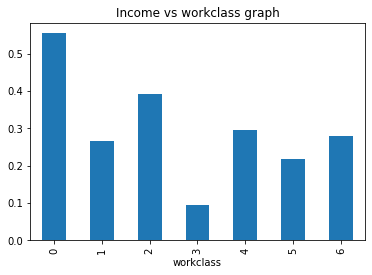

In [12]:
df.groupby('workclass').income.mean().plot(kind='bar').set_title('Income vs workclass graph')

Text(0.5, 1.0, 'Income vs education graph')

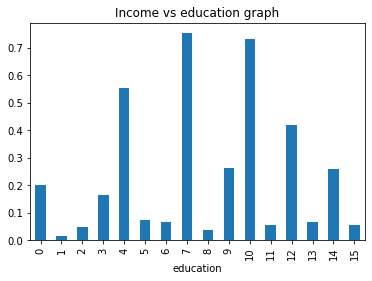

In [13]:
df.groupby('education').income.mean().plot(kind='bar').set_title("Income vs education graph")

Text(0.5, 1.0, 'Income vs marital-status graph')

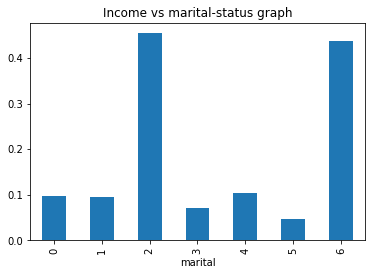

In [14]:
df.groupby('marital').income.mean().plot(kind='bar').set_title("Income vs marital-status graph")

Text(0.5, 1.0, 'Income vs occupation graph')

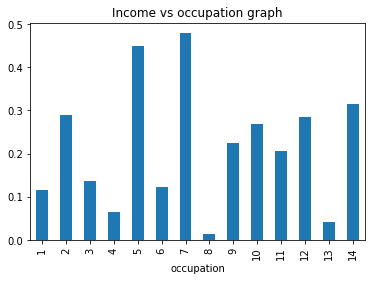

In [15]:
df.groupby('occupation').income.mean().plot(kind='bar').set_title("Income vs occupation graph")

Text(0.5, 1.0, 'Income vs relationship graph')

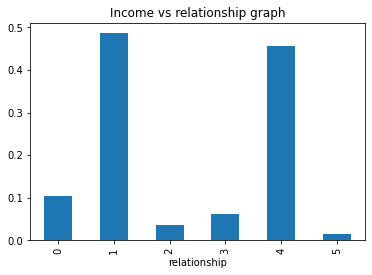

In [16]:
df.groupby('relationship').income.mean().plot(kind='bar').set_title("Income vs relationship graph")

Text(0.5, 1.0, 'Income vs race graph')

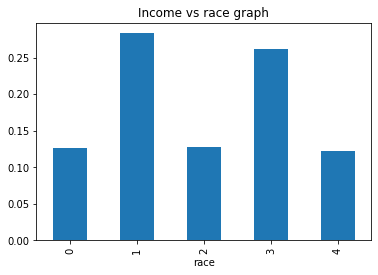

In [17]:
df.groupby('race').income.mean().plot(kind='bar').set_title("Income vs race graph")

Text(0.5, 1.0, 'Income vs gender graph')

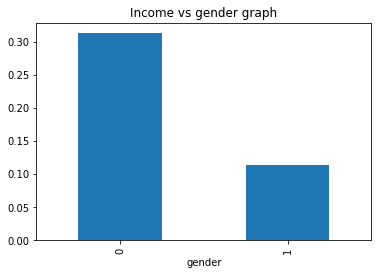

In [18]:
df.groupby('gender').income.mean().plot(kind='bar').set_title("Income vs gender graph")

##Segregate dataset into x and y
where x is the independent variable
and y is the dependent variable aka target variable


* x has the features age educational-num	capital-gain	hours-per-week	income
* y has the features income

In [19]:
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
df_y = pd.DataFrame(df.income)

##Splitting the dataset into train and test sets

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

##Training the model

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Testing the model

In [22]:
y_pred = model.predict(x_test)

##Evaluating the Model 

In [23]:
print("Accuracy of the model is :",round(metrics.accuracy_score(y_test, y_pred)*100,3))

Accuracy of the model is : 75.556
